# K-Means Elbows and Silhouettes

A compairison of the elbow and silhouette methods of [determining the number of clusters in a data set](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from time import sleep

In [2]:
def fake_blobs(max_k=5):
    k = np.random.randint(2, max_k + 1)
    X, y = make_blobs(
        n_samples=2048,
        n_features=2,
        centers=k,
        cluster_std=0.4,
        center_box=(2, 9),
    )
    return X, y, k

In [3]:
def plot_scores(X, actual_k, limit=16):
    title_size = 24
    label_size = 12
    ax_size = (16, 5)
    Ks = range(2, limit)
    sils = []
    wcss = []
    for k in Ks:
        k_means = KMeans(n_clusters=k, max_iter=1024, algorithm='full').fit(X)
        sils.append(silhouette_score(X, k_means.labels_))
        wcss.append(k_means.inertia_)
        if k == actual_k:
            model_k = k_means
    
    fig, [ax1, ax2] = plt.subplots(2, 1)
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.suptitle('Determining the K in K-Means ', fontsize=title_size)
    fig.text(0.055, 0.665, 'Elbow', rotation=90, fontsize=title_size)
    ax1.set_ylabel('Inertia', fontsize=label_size)
    ax1.set_xticks(Ks)
    ax1.plot(Ks, wcss)
    
    ax2.set_xlabel('Number of Clusters (K)', fontsize=label_size)
    fig.text(0.055, 0.21, 'Silhoeuette', rotation=90, fontsize=title_size)
    ax2.set_ylabel('Coefficient', fontsize=label_size)
    ax2.set_xticks(Ks)
    ax2.set_ylim(0, 1)
    ax2.plot(Ks, sils)
    max_sil = max(sils)
    ax2.vlines(Ks[sils.index(max_sil)], ymin=0, ymax=max_sil, color='grey', linestyle='dotted')
    plt.show()
    
    return model_k

In [4]:
def check_answer(k):
    try_again = True
    estimate = int(input('What is the best K? '))
    while try_again is True:
        if estimate == k:
            print(f'You are correct, there are {estimate} clusters.')
            try_again = False
        else:
            try_again = 'y' in input(
                f'{estimate} is not correct, would you like to take another guess? y/[N] ').lower()
            if try_again is True:
                estimate = int(input('What is the best K for this elbow plot? '))
            else:
                print(f'Sorry {estimate} is not correct, there are {k} clusters.')

In [5]:
def ax_confg(ax, title, title_size, axsize):
    ax.set_title(title, fontsize=title_size, pad=16)
    ax.set_xlim(axsize)
    ax.set_ylim(axsize)

In [6]:
def plot_blobs(X, y, k, labels, size=7, alpha=0.5):
    x1, x2 = X[:, 0], X[:, 1]
    heading = 24
    subheading = 20
    ax_size = (0, 12)
    ticks = []
    fig, [ax1, ax2] = plt.subplots(1, 2)
    fig.set_figwidth(16)
    fig.set_figheight(7)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    fig.suptitle(f'{k} Clusters', fontsize=heading)
    ax_confg(ax1, 'Original Clusters', subheading, ax_size)
    ax_confg(ax2, 'K-Means Clusters', subheading, ax_size)
    ax1.scatter(x1, x2, c=y, alpha=alpha)
    ax2.scatter(x1, x2, c=labels, alpha=alpha)

In [7]:
def main(max_k=10):
    limit = max(round(max_k * 1.5), 10)
    X, y, k = fake_blobs(max_k=max_k)
    model = plot_scores(X, k, limit=limit)
    check_answer(k)
    plot_blobs(X, y, k, model.labels_, size=7, alpha=0.5)

# Elbows and Silhouettes
---

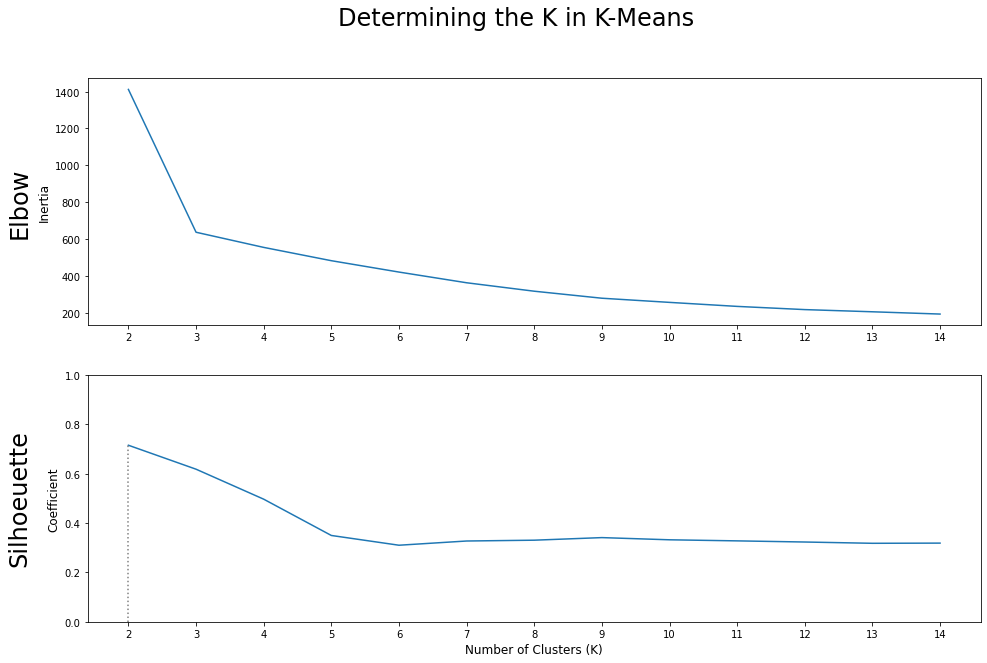

What is the best K? 2
2 is not correct, would you like to take another guess? y/[N] Y
What is the best K for this elbow plot? 3
You are correct, there are 3 clusters.


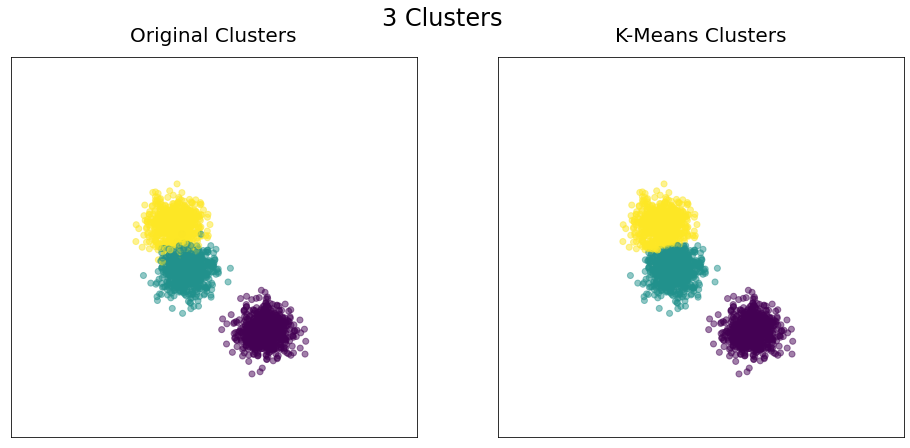

In [8]:
main()